## Problem 2: A shallow Network


**Neural Network:**
**Summary Of Implementation:**

The Shallow network is created made up of just 3 layers. A single neuron input layer, a Hidden layer made up 3 layers and an output layer built of single layer.
Just like the previous problem, the network is programmed where the class *ReLU_Network* handles all the functions of the network. The Network has 2 matrices of weights and biases which are hard coded during initialization. These weights are given random values to begin with.

ReLU is used as an activation function for all the neurons except the Output neuron whose output is just equal to $z_1^2$

ReLU is given by: $$ReLU(z) = max(z, 0)$$

The resultant plots of Cost vs Number Of iterations/Epochs are plotted to get an intuition of what's happening in the neural network.

Lastly, the Output, $y$ vs $a^2_1$ is plotted, and Mean squared Error is Calculated. 


**Training Data**
The Function *Generate1DTrainingData()* and *Generate2DTrainingData()* generate the required training samples. 
The 1D training data is generated from the equation $y = sin x$
where the value of x ranges from $(-\pi , 1.5\pi)$

The 2D training Data for the second sub-question is modelled based on equation:
$$y = sin x_1 + cos (x_2 + 5)$$

where the value of $x_1$ ranges from $(-\pi , \pi)$ and $x_2$ ranges from $(\pi, -\pi)$

The number of samples to be taken are variable and are tuned along with the hyper parameters to get a good result.



**Code**

**1D Shallow Network**

In [331]:
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\12403\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [332]:
#Hyper-parameters
InputLayerSize = 1
HiddenLayerSize = 6
TrainingDataSize = 55    # Number of Input Samples
NumOfIterations = 100    # Number of Epochs
alpha = 0.001      # Learning Rate

In [333]:
class ReLU_network():
    def __init__(self, x,y,i, h):
        self.inputLayerSize = i
        self.hiddenLayerSize = h
        self.outputLayerSize = 1
        self.m = len(x) #Number Of Samples
        self.input = x
        self.y = y
        
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
        self.B1 = np.random.randn(self.hiddenLayerSize)
        self.B2 = np.random.randn(self.outputLayerSize)
        
    def ReLU(self, Z):
        return np.maximum(Z, 0)
    
    def Feedforward(self, X):
        #Input to Hidden Layer
        self.z1 = np.dot(X, self.W1) + self.B1
        self.a1 = self.ReLU(self.z1)
        
        #Hidden Layer to Output
        self.z2 = np.dot(self.a1, self.W2) + self.B2
        self.a2 = self.z2
        return self.a2
    
    def dReLU(self, Z):
        return 1.* (Z>0) #Derivative of RelU
    
    def costFunction(self, X):
        self.a2 = self.Feedforward(X)
        Cost = 0.5*sum((self.y - self.a2)**2)/len(self.a2)
        return Cost
    
    
    def deltaCost(self):
        self.a2 = self.Feedforward(self.input)
        
        delta2 = -(self.y - self.a2)
        dJ_dW2 = np.dot(self.a1.T, delta2)/self.m
        
        dJ_B2 = np.sum(delta2)
        
        delta1 = np.dot(delta2, self.W2.T)*self.dReLU(self.z1)
        dJ_dW1 = np.dot(self.input.T, delta1)/self.m
        dJ_B1 = np.sum(delta1)/self.m
        return dJ_dW1, dJ_B1, dJ_dW2, dJ_B2
    
    def UpdateParameters(self, dJ_dW1, dJ_B1, dJ_dW2, dJ_B2):
        self.W2 = self.W2 - (alpha*dJ_dW2)
        self.B2 = self.B2 - (alpha*dJ_B2)
        
        self.W1 = self.W1 - (alpha*dJ_dW1)
        self.B1 = self.B1 - (alpha*dJ_B1)

In [334]:
def Generate1DTrainingData(Size):
    x = np.linspace(-np.pi, (np.pi*1.5), Size).reshape(Size, 1)    
    y = np.sin(x)
    return x, y
    

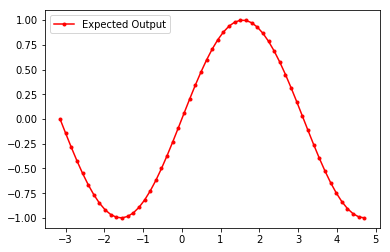

In [335]:
x,y = Generate1DTrainingData(TrainingDataSize)
plot(x,y, color = 'red', marker = ".")
legend(["Expected Output"])

In [336]:
NN = ReLU_network(x,y,InputLayerSize, HiddenLayerSize)

In [337]:
Output = NN.Feedforward(x)

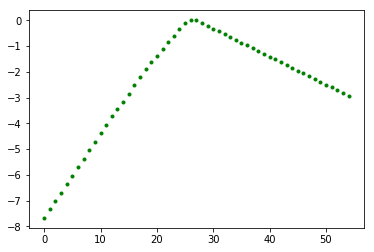

In [338]:
plot(Output, '.', color = "green")

In [339]:
cost = NN.costFunction(x)
print(cost)

4.2539694099343945


Final Cost = 0.4613084424773228


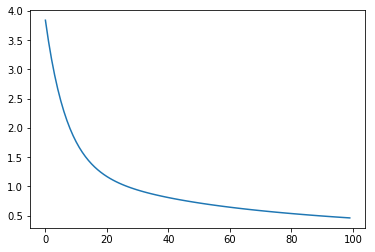

In [340]:
CostTracker = np.zeros(NumOfIterations)
for i in range(NumOfIterations):
    dJ_dW1, dJ_B1, dJ_dW2, dJ_B2 = NN.deltaCost()
    NN.UpdateParameters(dJ_dW1, dJ_B1, dJ_dW2, dJ_B2)
    Output_New = NN.Feedforward(x)
    CostTracker[i] = NN.costFunction(x)

plot(CostTracker)
print("Final Cost = " + str(CostTracker[NumOfIterations-1]))

Text(0.5,1,'Comparision of y and a2_out')

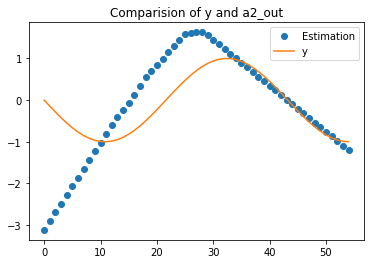

In [341]:
plot(Output_New, 'o')
plot(y)
legend(["Estimation", "y"])
title("Comparision of y and a2_out")

**2D Shallow Network**

<Description>

In [342]:
#Hyper-parameters
InputLayerSize = 2
HiddenLayerSize = 5
TrainingDataSize = 50    # Number of Input Samples
NumOfIterations = 100  # Number of Epochs
alpha = 0.001      # Learning Rate
TestdataSize = 20

**Generate 2D Training Data**

The 2D training Data for the second sub-question is modelled based on equation:
$$y = sin x_1 + cos (x_2 + 5)$$

where the value of $x_1$ ranges from $(-\pi , \pi)$ and $x_2$ ranges from $(\pi, -\pi)$

In [343]:
def Generate2DTrainingData(Size):
    x1 = np.linspace(-np.pi, (np.pi), Size).reshape(Size, 1)
    x2 = np.linspace(np.pi, (-np.pi), Size).reshape(Size, 1)
    y = np.sin(x1) + np.cos(x2+5)
    x = np.concatenate((x1,x2), axis=1)
    plot(x1)
    plot(x2)
    plot(y)
    legend(["x1", "x2", "y"])
    title("Test Inputs x1, x2 and respective Output y")
    return x, y

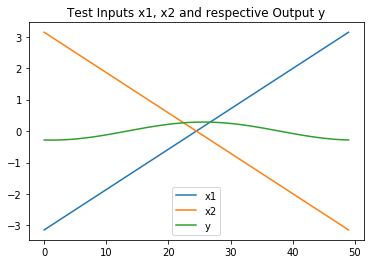

In [344]:
x, y = Generate2DTrainingData(TrainingDataSize)

In [345]:
NN2 = ReLU_network(x,y,InputLayerSize, HiddenLayerSize)

In [346]:
Output2 = NN2.Feedforward(x)

Text(0.5,1,'Output of Untrained Network')

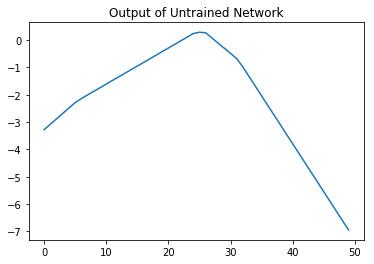

In [347]:
plot(Output2)
title("Output of Untrained Network")

In [348]:
cost2 = NN2.costFunction(x)
print("Initial Cost = " + str(cost2))

Initial Cost = 3.8720560031550404


0.4311765341021794


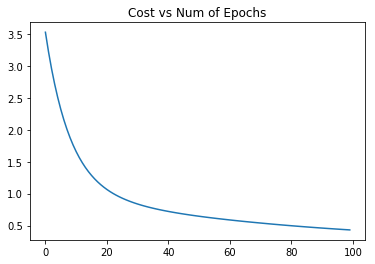

In [349]:
CostTracker2 = np.zeros(NumOfIterations)
for i in range(NumOfIterations):
    dJ_dW1, dJ_B1, dJ_dW2, dJ_B2 = NN2.deltaCost()
    NN2.UpdateParameters(dJ_dW1, dJ_B1, dJ_dW2, dJ_B2)
    Output2_New = NN2.Feedforward(x)
    CostTracker2[i] = NN2.costFunction(x)

plot(CostTracker2)
title("Cost vs Num of Epochs")
print(CostTracker2[NumOfIterations-1])

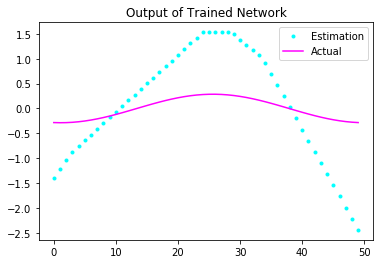

In [350]:
plot(Output2_New , '.', color = "cyan")
plot(y, color = "magenta")
title("Output of Trained Network")
legend(["Estimation", "Actual"])

### Testing

The Test data for the network is genrated using the same equation used to create the training data. This time, the data samples are taken at random from a range $x_1 = (0 , -\pi)$ and $x_2 = (0, +\pi)$

These values are fed to the Network trained earlier. No parameters were changed or tuned during this time. The output plots same as before ie $y$ vs $a_1^2$ and MSE is estimated.

In [351]:
def Generate2DTestData(TestSize):
    Test_inp_1 = (0+np.pi) * np.random.random_sample(TestSize).reshape(TestSize, 1) + (-np.pi)
    Test_inp_2 = (0-np.pi) * np.random.random_sample(TestSize).reshape(TestSize, 1) + np.pi
    Test_inp = np.concatenate((Test_inp_1, Test_inp_2), axis=1)
    Test_Out = np.zeros(TestSize).reshape(TestSize,1)
    for n in range(TestSize):
        Test_Out = np.sin(Test_inp_1) + np.sin(Test_inp_2+2)
    plot(Test_inp_1)
    plot(Test_inp_2)
    title("Input x1,x2")
    figure()
    plot(Test_Out)
    title("Test Data Output y")
    return Test_inp,Test_Out

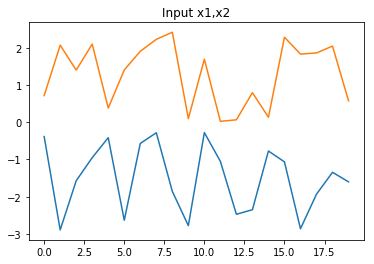

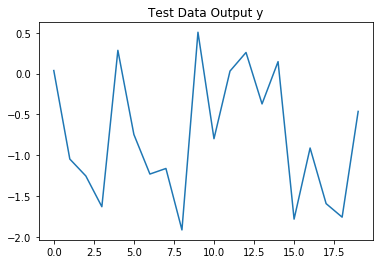

In [352]:
x, y = Generate2DTestData(TestdataSize)

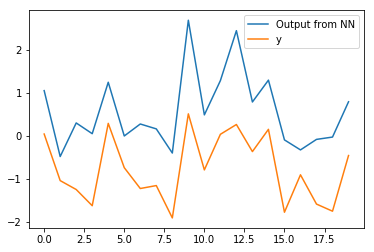

In [353]:
Output_Test = NN2.Feedforward(x)
plot(Output_Test)
plot(y)
legend(["Output from NN","y"])

In [354]:
Error = np.sum((y- Output_Test)**2)/TestdataSize
print("Error = " + str(Error))

Error = 1.9830017663577564


#### Observations

From the above graphs and analysis, It is found that non-linear functions are much difficult to estimate as compared to linear graphs such as the one from previosu problem. In 1-D data, it was relatively much simpler to converge the result with ground truth. With more input dimensions and more number of neurons adding up, the cost function does not behave smoothly. At times, unexpected curves wer noticed. But they were fixed easily by tweaking the number of neurons in the hidden layer.